In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv("housing.csv")

In [3]:
print(dataset.head(5))
print("Dataset shape:", dataset.shape)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
Dataset shape: (20640, 10)


In [4]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (dataset.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (dataset.dtypes == 'float64')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 1
Integer variables: 0
Float variables: 9


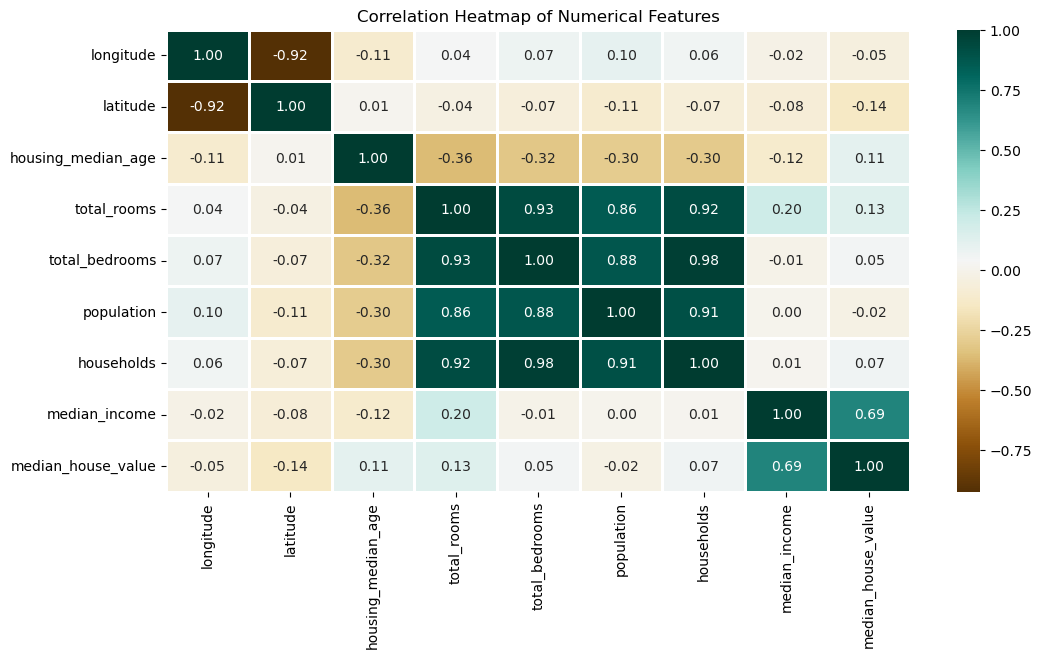

In [5]:
numerical_dataset = dataset.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

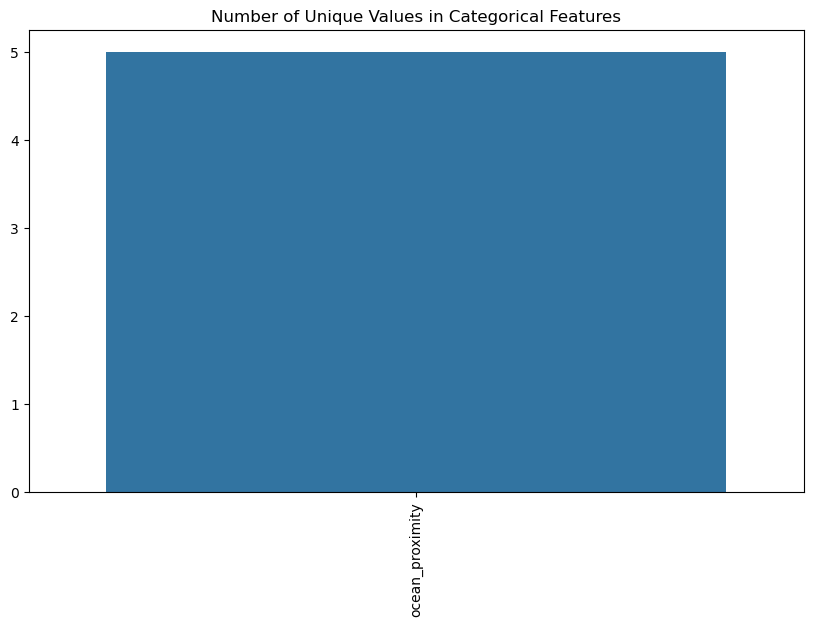

In [6]:
unique_values = [dataset[col].nunique() for col in object_cols]
plt.figure(figsize=(10, 6))
plt.title('Number of Unique Values in Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=unique_values)
plt.show()

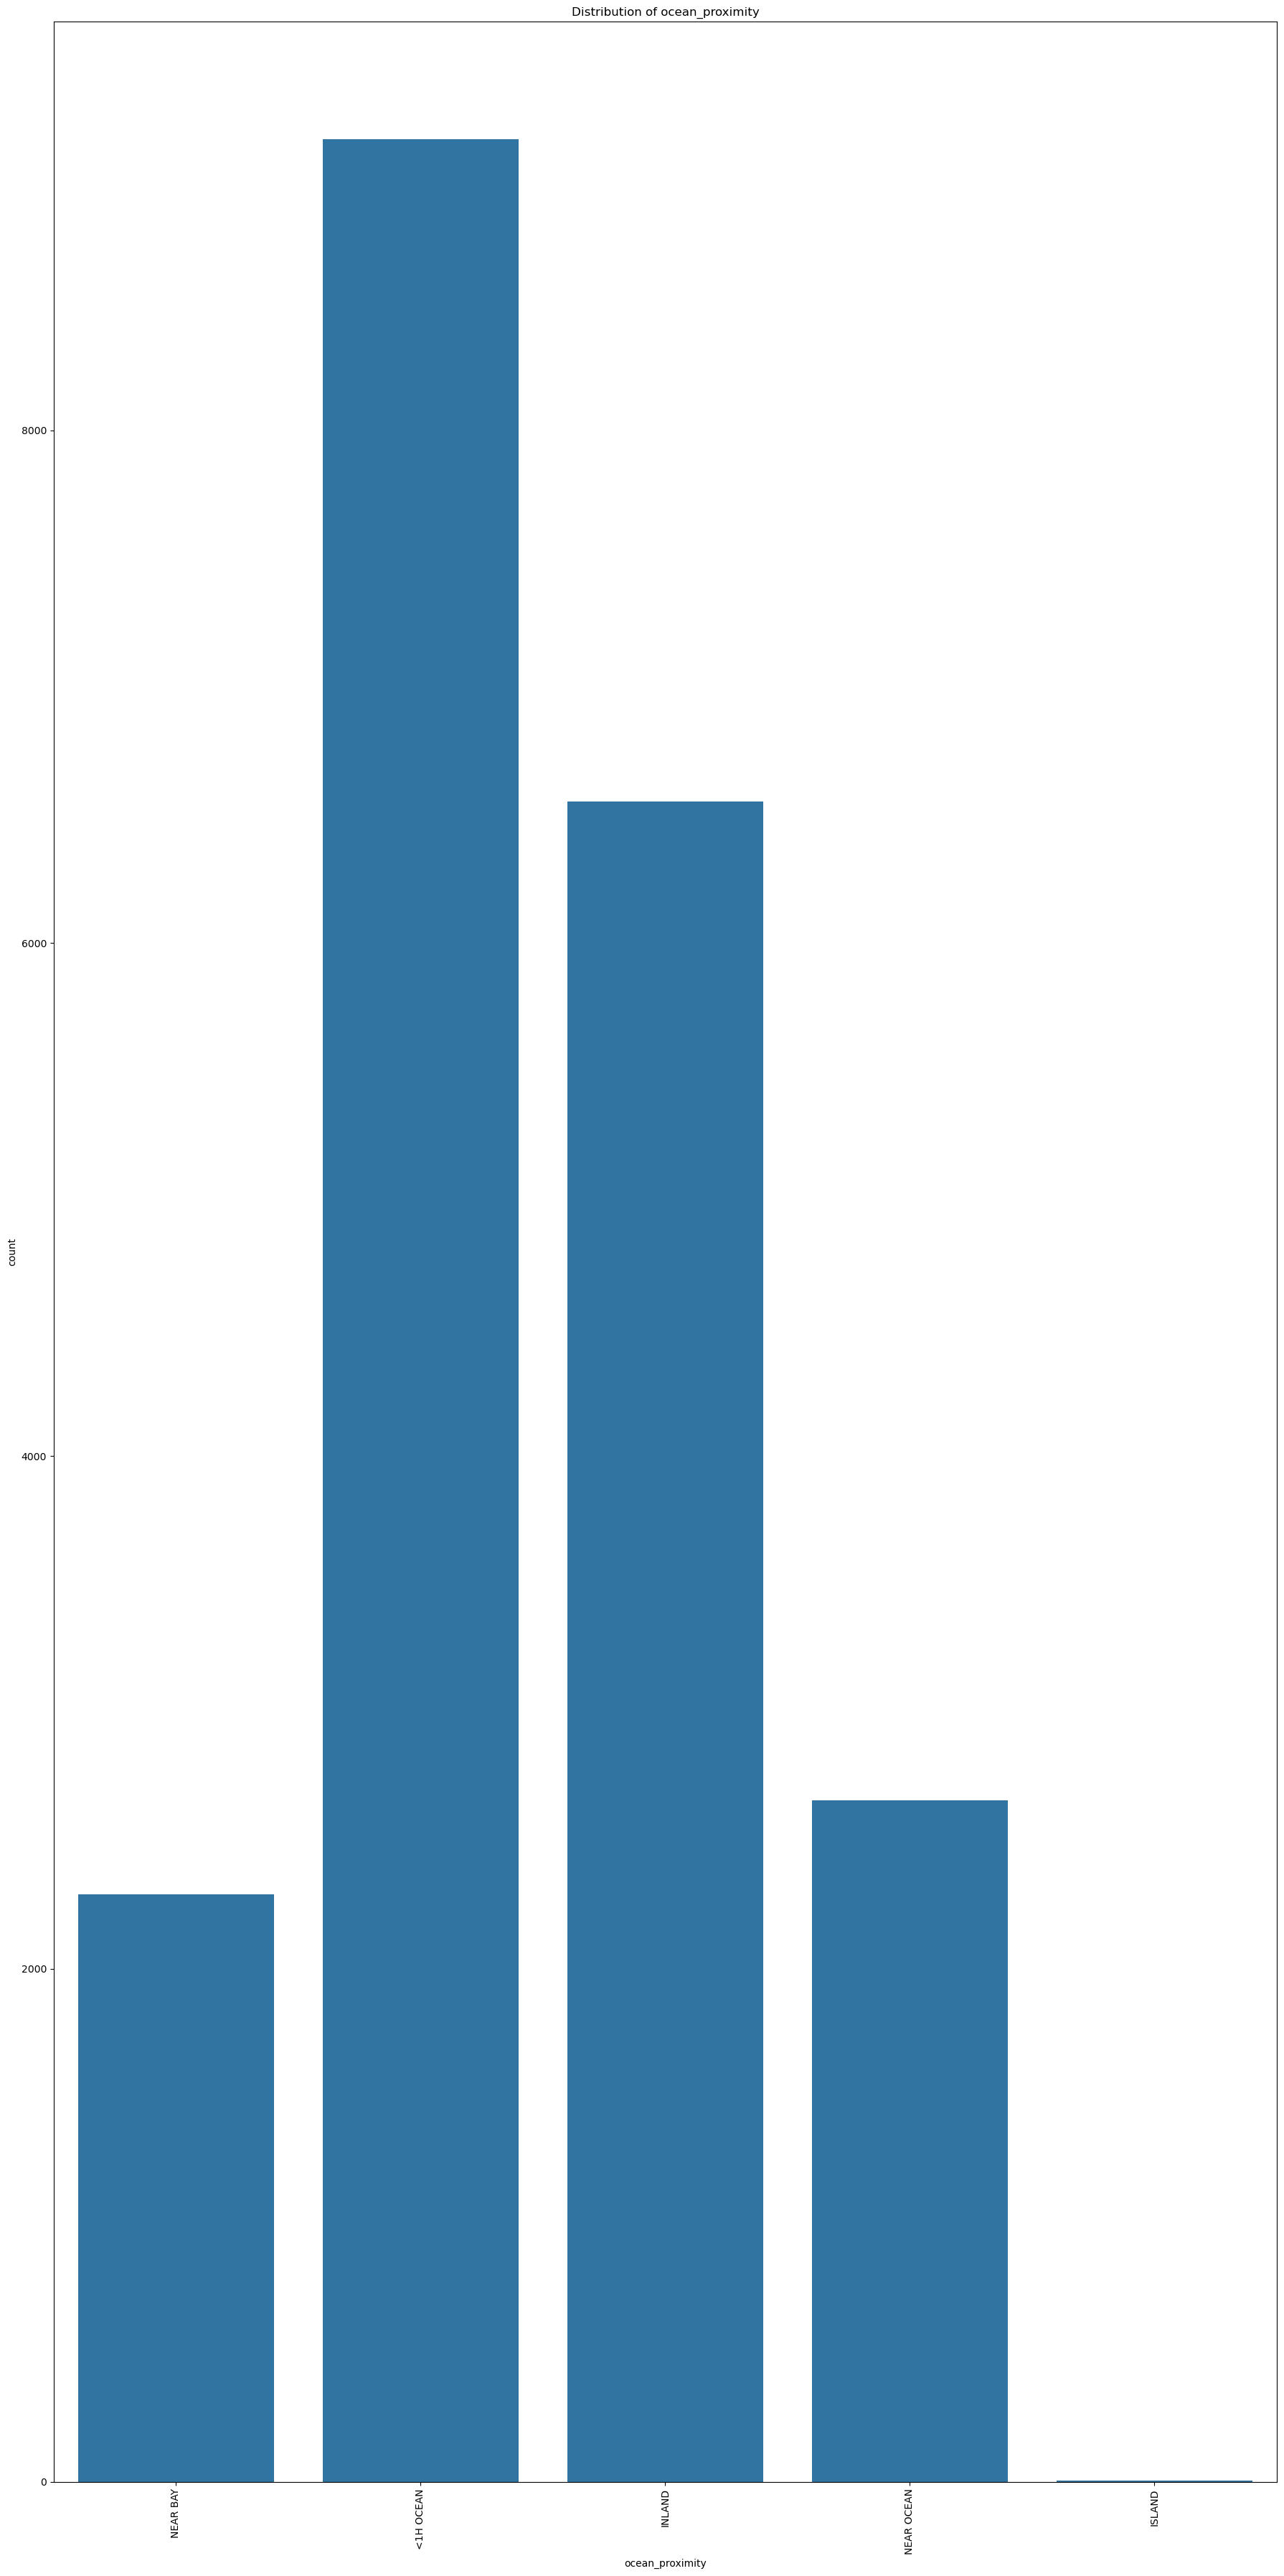

In [7]:
plt.figure(figsize=(18, 36))
index = 1
for col in object_cols:
    plt.subplot(len(object_cols), 1, index)
    plt.xticks(rotation=90)
    sns.countplot(data=dataset, x=col)
    plt.title(f'Distribution of {col}')
    index += 1
plt.tight_layout()
plt.show()

In [8]:
if 'Id' in dataset.columns:
    dataset.drop(['Id'], axis=1, inplace=True)

if 'SalePrice' in dataset.columns:
    dataset['SalePrice'].fillna(dataset['SalePrice'].mean(), inplace=True)

dataset_clean = dataset.dropna()

print("Missing values after cleaning:\n", dataset_clean.isnull().sum())

Missing values after cleaning:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [9]:
s = (dataset_clean.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables for encoding:")
print(object_cols)

OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset_clean[object_cols]))
OH_cols.index = dataset_clean.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset_clean.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

Categorical variables for encoding:
['ocean_proximity']


In [10]:
print(df_final.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [11]:
Y = dataset_clean['median_house_value']
X_categorical = dataset_clean[object_cols]
X_numerical = dataset_clean.drop(object_cols + ['median_house_value'], axis=1)


OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X_categorical))
OH_cols.index = X_categorical.index
OH_cols.columns = OH_encoder.get_feature_names_out()


X_final = pd.concat([X_numerical, OH_cols], axis=1)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


Y = dataset_clean['median_house_value']


X_train, X_valid, Y_train, Y_valid = train_test_split(X_final, Y, train_size=0.8, test_size=0.2, random_state=0)


model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred_SVR = model_SVR.predict(X_valid)
print("SVR Mean Absolute Percentage Error:", mean_absolute_percentage_error(Y_valid, Y_pred_SVR))


model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred_RFR = model_RFR.predict(X_valid)
print("Random Forest Mean Absolute Percentage Error:", mean_absolute_percentage_error(Y_valid, Y_pred_RFR))


model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred_LR = model_LR.predict(X_valid)
print("Linear Regression Mean Absolute Percentage Error:", mean_absolute_percentage_error(Y_valid, Y_pred_LR))

SVR Mean Absolute Percentage Error: 0.5246195604384525
Random Forest Mean Absolute Percentage Error: 0.18589009551826097
Linear Regression Mean Absolute Percentage Error: 0.2864193519216636
